In [6]:
from google.colab import files

uploaded = files.upload()  # This will open a file chooser to upload your CSV


Saving superstore_clean.csv to superstore_clean.csv


In [14]:
import pandas as pd

# Define all column names (22 columns in your case)
columns = ['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
           'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
           'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
           'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Extra_Col']

# Load CSV with no header
df = pd.read_csv("superstore_clean.csv",
                 header=None,          # No header in CSV
                 names=columns,        # Use defined column names
                 quotechar='"',
                 encoding='latin1',
                 on_bad_lines='skip')

# Quick check
print(df.head())
print(df.columns.tolist())


   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City  ... Region  \
0      Claire Gute   Consumer  United States        Henderson  ...  South   
1      Claire Gute   Consumer  United States        Henderson  ...  South   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   West   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   

        Product_ID         Category Sub_Category  

In [15]:
# -------------------------------
#  Convert Dates & Calculate Days_To_Ship
# -------------------------------
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')

# Calculate shipping/inventory days
df['Days_To_Ship'] = (df['Ship_Date'] - df['Order_Date']).dt.days

# Check the first few rows
print(df[['Order_Date', 'Ship_Date', 'Days_To_Ship', 'Profit']].head())


  Order_Date  Ship_Date  Days_To_Ship  Profit
0 2016-11-08 2016-11-11             3   41.91
1 2016-11-08 2016-11-11             3  219.58
2 2016-06-12 2016-06-16             4    6.87
3 2015-10-11 2015-10-18             7 -383.03
4 2015-10-11 2015-10-18             7    2.52


Correlation between Days_To_Ship and Profit: -0.004658778174650013


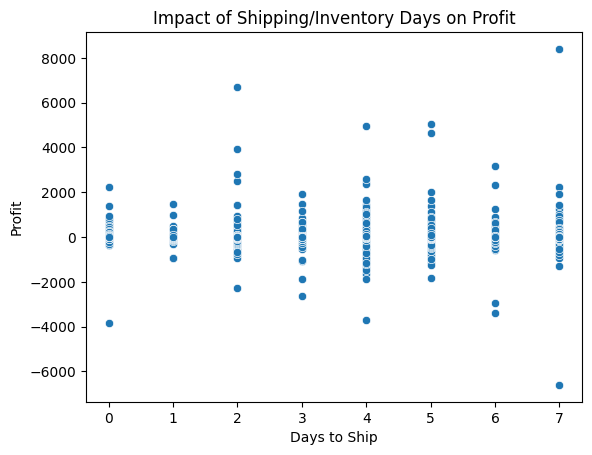

In [16]:
# -------------------------------
#  Correlation Analysis
# -------------------------------
# Correlation coefficient
correlation = df['Days_To_Ship'].corr(df['Profit'])
print("Correlation between Days_To_Ship and Profit:", correlation)

# Scatter plot: Days_To_Ship vs Profit
sns.scatterplot(data=df, x='Days_To_Ship', y='Profit')
plt.title('Impact of Shipping/Inventory Days on Profit')
plt.xlabel('Days to Ship')
plt.ylabel('Profit')
plt.show()

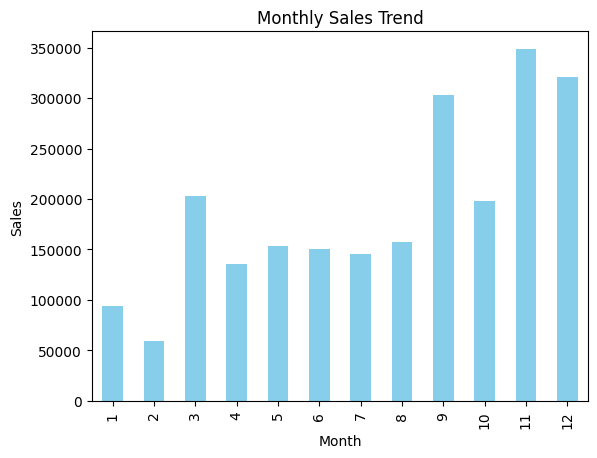

In [20]:
# -------------------------------
#  Seasonal / Monthly Trend Analysis
# -------------------------------
# Extract month from Order_Date
df['Order_Month'] = df['Order_Date'].dt.month

# Monthly Sales Trend
monthly_sales = df.groupby('Order_Month')['Sales'].sum()
monthly_sales.plot(kind='bar', title='Monthly Sales Trend', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()




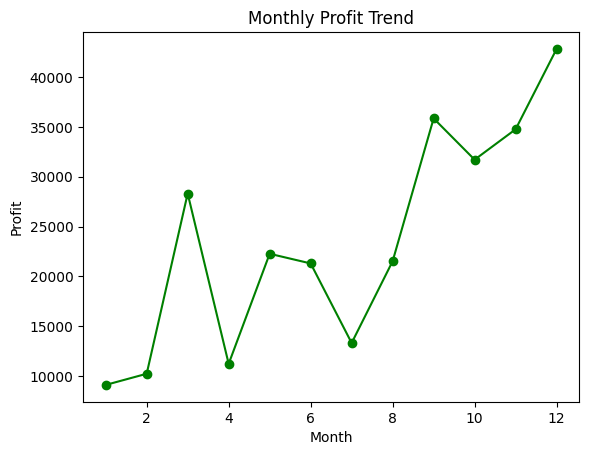

In [21]:
# Monthly Profit Trend
monthly_profit = df.groupby('Order_Month')['Profit'].sum()
monthly_profit.plot(kind='line', marker='o', title='Monthly Profit Trend', color='green')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

In [19]:
# -------------------------------
#   Top 5 Slowest Shipping Orders
# -------------------------------
slowest_orders = df[['Order_ID', 'Days_To_Ship', 'Profit']].sort_values(by='Days_To_Ship', ascending=False).head(5)
print("Top 5 orders with longest shipping days:\n", slowest_orders)

Top 5 orders with longest shipping days:
             Order_ID  Days_To_Ship  Profit
7142  CA-2016-151974             7    5.37
8138  CA-2017-110625             7    9.89
3191  US-2014-117170             7    1.68
5772  CA-2016-151092             7   18.48
8130  CA-2016-163048             7    0.00
